Missing values:
 A1       0
A2       0
A3       0
A4       0
A5       0
A6       0
A7       0
A8       0
A9       0
A10      0
A11      0
A12      0
A13      0
A14      0
Class    0
dtype: int64

Summary Statistics:
                A1          A2          A3          A4          A5          A6  \
count  690.000000  690.000000  690.000000  690.000000  690.000000  690.000000   
mean     0.678261   31.568203    4.758725    1.766667    7.372464    4.692754   
std      0.467482   11.853273    4.978163    0.430063    3.683265    1.992316   
min      0.000000   13.750000    0.000000    1.000000    1.000000    1.000000   
25%      0.000000   22.670000    1.000000    2.000000    4.000000    4.000000   
50%      1.000000   28.625000    2.750000    2.000000    8.000000    4.000000   
75%      1.000000   37.707500    7.207500    2.000000   10.000000    5.000000   
max      1.000000   80.250000   28.000000    3.000000   14.000000    9.000000   

               A7          A8          A9        A10 

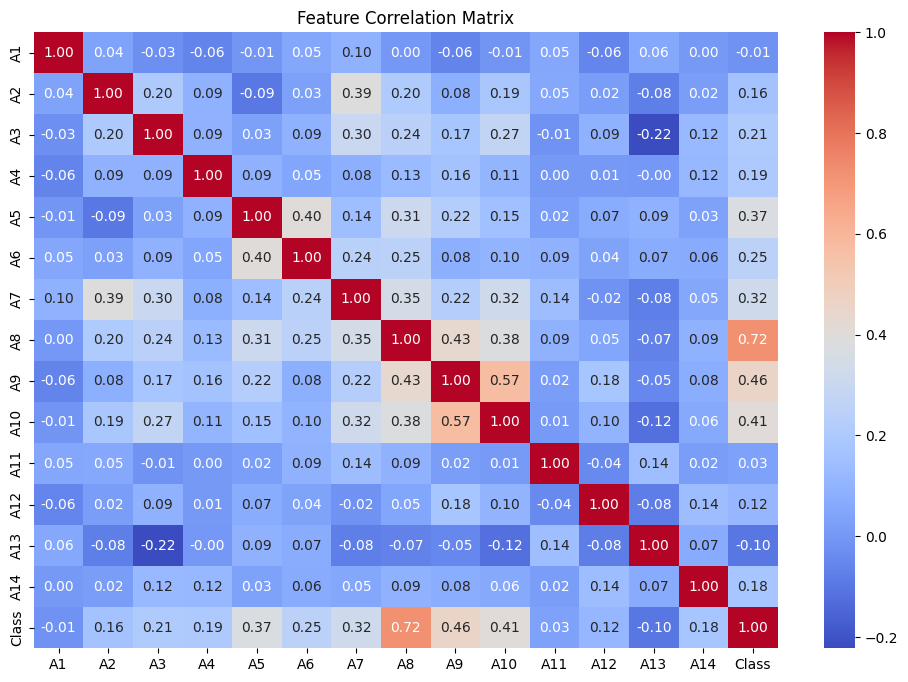

<ipython-input-2-56a3193fd746>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Class'], palette="coolwarm")


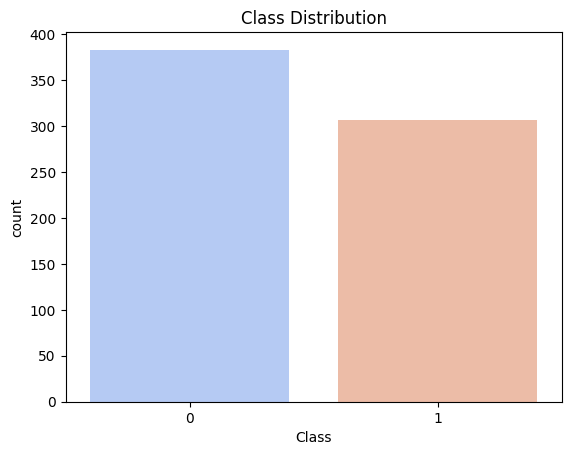

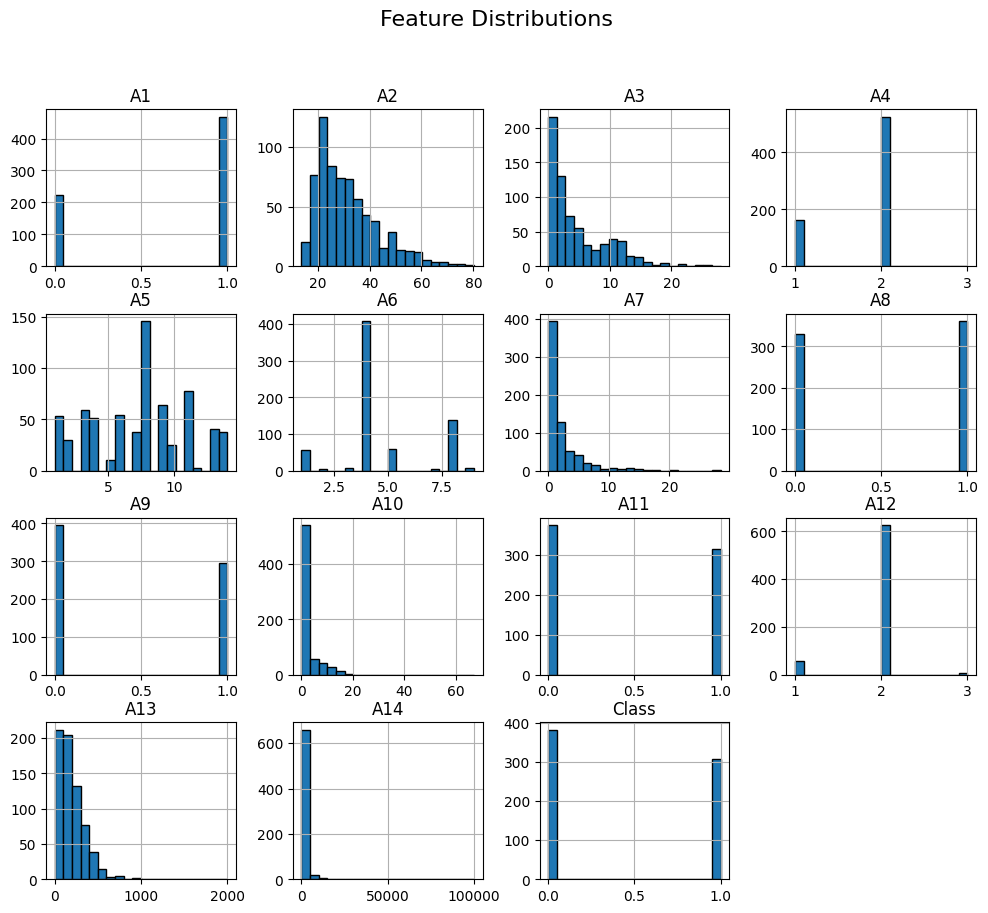


SVM Model Performance:
Accuracy: 0.8478260869565217
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88        87
           1       0.79      0.80      0.80        51

    accuracy                           0.85       138
   macro avg       0.84      0.84      0.84       138
weighted avg       0.85      0.85      0.85       138

Confusion Matrix:
 [[76 11]
 [10 41]]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
file_path = "Credit_Card_Applications.csv"
df = pd.read_csv(file_path)

# Drop CustomerID (not needed for prediction)
df.drop(columns=["CustomerID"], inplace=True)

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:\n", df.describe())

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# Check class balance
sns.countplot(x=df['Class'], palette="coolwarm")
plt.title("Class Distribution")
plt.show()

# Plot distributions of numerical features
df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# Split features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train and evaluate SVM model
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\nSVM Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
